### PART 1 ###
### Clustering ###


This is an unsupervised learning technique where the algorithm groups a set amount of objects in a way where they belong in a group. These groups or clusters contain objects that are more similar to each other than the other clusters. The K-clustering takes a predefined number of clusters then recalculates the clusters center with the mean of the assigned points. This repeats until the difference is very minimal. 

Strengths:
Good for identifying the inherent groupings within data.
Useful in preliminary data analysis to identify patterns or groups.
Applicable to a wide range of domains.

Weaknesses:
The number of clusters (K) needs to be specified in advance.
Sensitive to the initial choice of clusters and outliers.
Can struggle with clusters of varying sizes and densities.

There is a dataset on customers for a retail store, like clothes, food, electronics, gardening. For a marketing campaign, the customers need to be segmented into groups. So using the clusters as k=3 for budget, moderate, and luxury shoppers. The cluster represents the spending habits which then could be marketed. 

### Association ###

This technique is used to discover relations between variables. The algorithm used is the  Apriori algorithm. The individual items are identified that appear together in a transaction. 

Strengths:

Can uncover interesting relationships between attributes.
Useful for market basket analysis, cross-selling strategies, and catalog design.
Does not require any pre-defined model.

Weaknesses:

Have to specify the minimum threshold.
Association does not imply causation.

Looking at the dataset of what customers buy, let us say that if a customer buys bread and lunch meat, they are likely to buy cheese as well. If the specified support and confidence thresholds are met for every bread and lunch meat there is cheese, then there is a strong association. A promotion can run on these items.  


### Correlation analysis ###

This technique measures the statistical relation between two continuous variables. It quantifies the degree to which a change in one variable is associated with a change in another. A common method is the Pearsoncorrelation coefficient is a common measure of strength and direction of a linear relationship between two variables.

Strengths:

Helps in identifying potential relationships for further analysis.
Can be used to filter out irrelevant features in data preprocessing.

Weaknesses:

Only measures linear relationships; non-linear relationships might be missed.
Correlation does not imply causation.
Sensitive to outliers, which can significantly skew the correlation coefficient.

This could be used in financial databases like stocks. Analyzing the correlation between the stock prices of tech companies might reveal how closely they follow each other's market movements, assisting in portfolio diversification.

# Introduction

In this project we will be looking at the "Adult" dataset from the UCI Machine Learning Repository to find patterns/associations in the data. This dataset consists of information regarding adult's careers, education, social life, etc. so it can be valuable in identifying patterns in people with different backgrounds. In order to identify these patterns we will use k-means clustering to identify different demographics as well as rule mining to identify what associations exist in the features.

# Data Analysis

The "Adult" dataset can be found here https://archive.ics.uci.edu/dataset/2/adult and contains the following features:
1. age: numerical feature that represents the age of the person
2. workclass: categorical feature representing the persons employment state
3. nflwgt: numerical feature that represents the number of people in a population represented by the observations
4. education: categorical feature that represents the education level of the person
5. education-number: numerical representation of the education feature
6. marital-status: categorical feature that represents the marital state of the person
7. occupation: categorical feature that describes the person's job
8. relationship: categorical feature that describes the person's family
9. race: categorical feature that describes the person's race
10. sex: categorical feature that describes the person's sex
11. capital-gain: numerical feature that describes the person's profit gain from selling assets
12. capital-loss: numerical feature that describes the person's profit loss from selling assets
13. hours-per-week: numerical feature that represents number of hours the person works per week
14. native-country: categorical feature that describes the person's native country
15. income: binary feature that represents whether a person's income is above or below 50k

## Data Import

In [22]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
adult = fetch_ucirepo(id=2)

# Data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# Convert features and target to Pandas DataFrames
df_X = pd.DataFrame(data=X, columns=adult.feature_names)
df_y = pd.DataFrame(data=y, columns=['income'])

# Concatenate features and target into a single DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Description

Dataset has 48842 entries with a small number of holes scattered throughout.

In [23]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Data types of the columns
print("\nData Types:\n", df.dtypes)

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (48842, 15)

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Missing Values:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Descriptive Statistics

descriptive statistics show that most of the people in this population are between the age 28 and 48, there isnt much capital loss or gain in this population and most work 40 hours a week. This tells me that this population consists mostly of working class people, with little people being incredibly wealthy or unwealthy.

In [24]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Correlation Analysis

Correlation analysis reveals that there are no correlations between the numerical features in the dataset. Note that education-num holds no weight since this is the label encoded represenation of the education feature, meaning the correlation analysis is invalid for this feature.

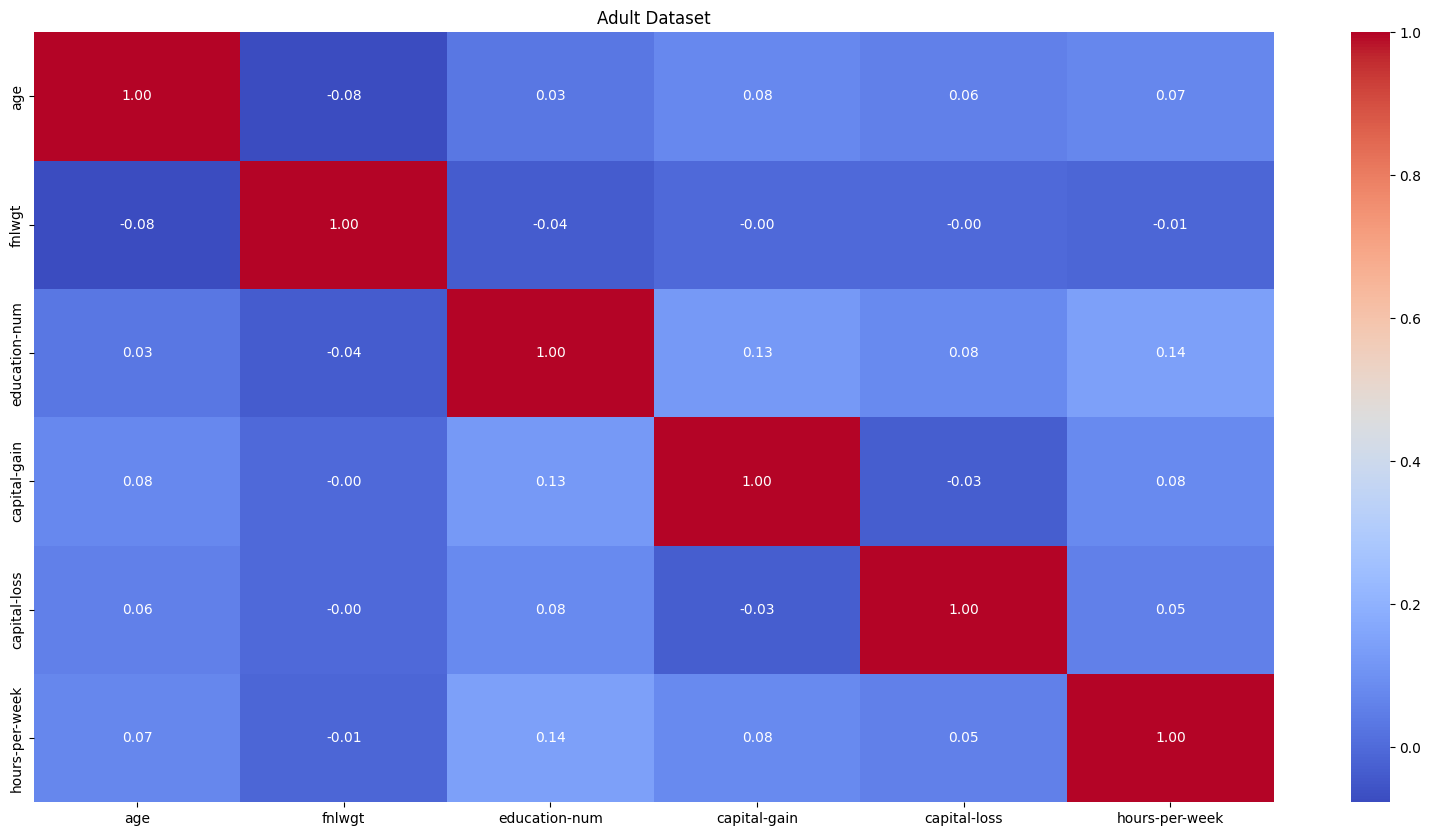

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only the numerical columns (excluding the last categorical feature)
numerical_df = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Adult Dataset')
plt.show()

## Distribution

Looking at the distribution of data we can say that the majority of the population has an education of highschool or higher and below a masters, work for a private corporation, are either married or never married, has a wide variety of occupations, and consists of mostly white males

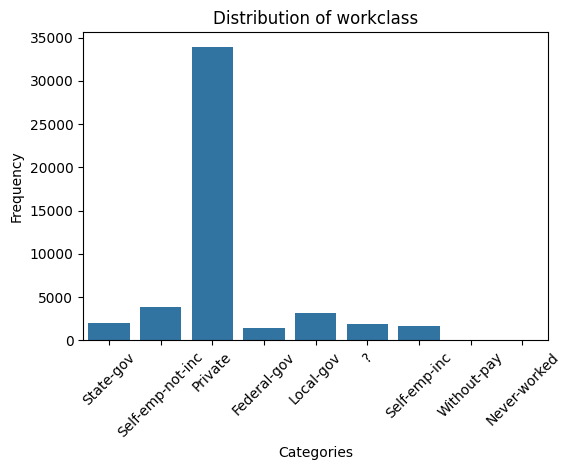

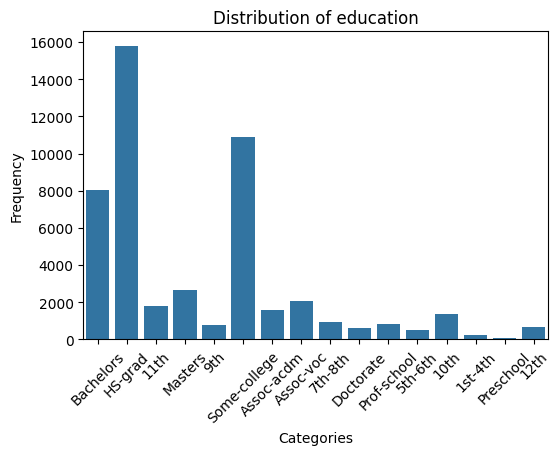

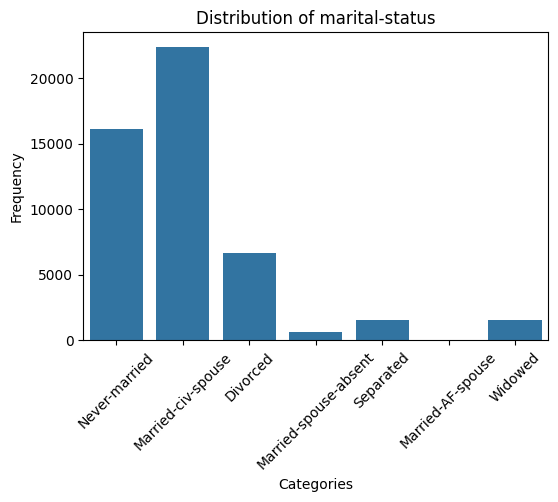

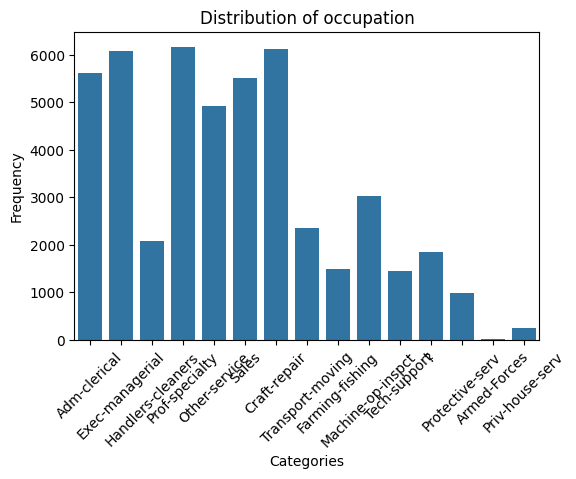

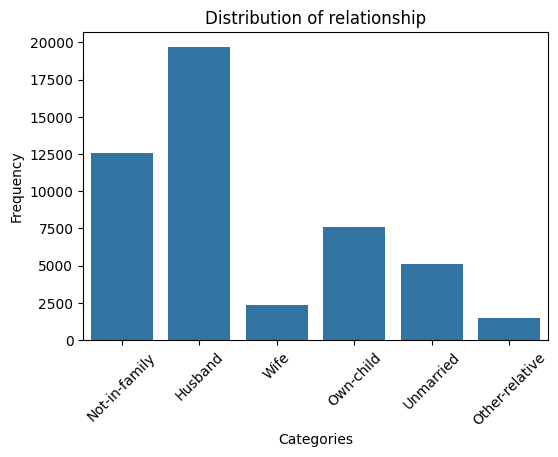

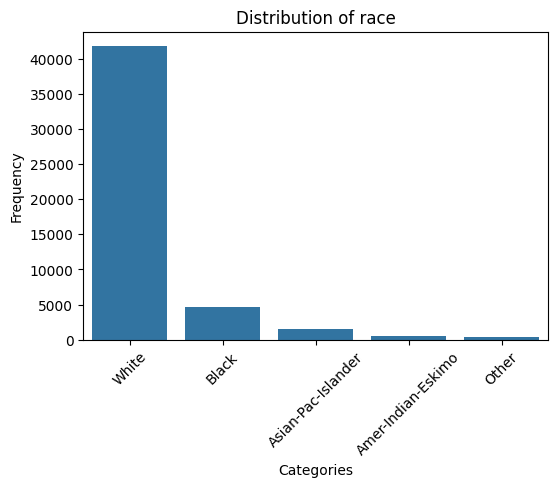

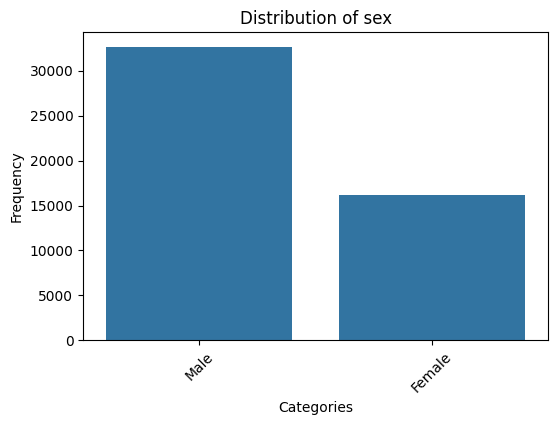

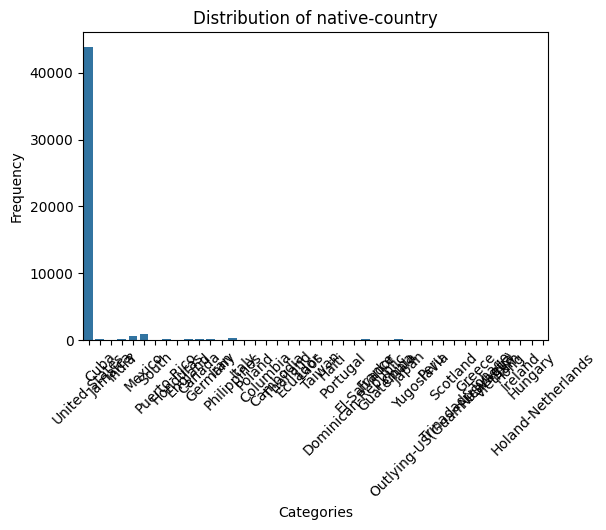

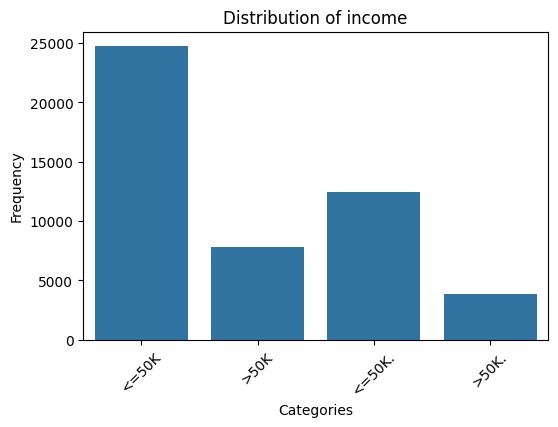

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        # Compute value counts for the categorical column
        distribution = df[column].value_counts()
        
        # Plot distribution using seaborn countplot
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()


# Data Preprocessing

remove entries with holes, this is fine because the dataset is very large compared to the number of entries with holes.

In [27]:
# Remove entries with any missing values
cleaned_df = df.dropna()


filter out unnecessary features and keeping only those that give insight to a person's demographic. Dropped features include 'fnlwgt', 'education-num', 'capital-gain', and 'capital-loss'

In [28]:
columns_to_drop = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss']

# Drop columns
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


create a new feature in basket form that includes the persons data in a list so we can use this for rule mining

In [29]:

# Create a new feature in basket form
df['basket_data'] = df.apply(lambda row: list(row), axis=1) 

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,basket_data
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,"[39, State-gov, Bachelors, Never-married, Adm-..."
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,"[50, Self-emp-not-inc, Bachelors, Married-civ-..."
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,"[38, Private, HS-grad, Divorced, Handlers-clea..."
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,"[53, Private, 11th, Married-civ-spouse, Handle..."
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,"[28, Private, Bachelors, Married-civ-spouse, P..."


Label encode categorical features, although this introduces ordinality to our categorical features k-means clustering isn't affected by this since it relies on the data points spatial position. This is only necessary for the k-means clustering since rule mining accepts categorical values so we will make a seperate set of data for each.

In [30]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and features_to_encode is a list of feature names
features_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

# Initialize LabelEncoder
label_encoders = {}

# Encode each feature in the list
for feature in features_to_encode:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])
    label_encoders[feature] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping for each feature
for feature, mapping in label_encoders.items():
    print(f"Mapping for {feature}:")
    for label, category_name in mapping.items():
        print(f"{category_name} -> {label}")

df.head()


Mapping for workclass:
0 -> ?
1 -> Federal-gov
2 -> Local-gov
3 -> Never-worked
4 -> Private
5 -> Self-emp-inc
6 -> Self-emp-not-inc
7 -> State-gov
8 -> Without-pay
9 -> nan
Mapping for education:
0 -> 10th
1 -> 11th
2 -> 12th
3 -> 1st-4th
4 -> 5th-6th
5 -> 7th-8th
6 -> 9th
7 -> Assoc-acdm
8 -> Assoc-voc
9 -> Bachelors
10 -> Doctorate
11 -> HS-grad
12 -> Masters
13 -> Preschool
14 -> Prof-school
15 -> Some-college
Mapping for marital-status:
0 -> Divorced
1 -> Married-AF-spouse
2 -> Married-civ-spouse
3 -> Married-spouse-absent
4 -> Never-married
5 -> Separated
6 -> Widowed
Mapping for occupation:
0 -> ?
1 -> Adm-clerical
2 -> Armed-Forces
3 -> Craft-repair
4 -> Exec-managerial
5 -> Farming-fishing
6 -> Handlers-cleaners
7 -> Machine-op-inspct
8 -> Other-service
9 -> Priv-house-serv
10 -> Prof-specialty
11 -> Protective-serv
12 -> Sales
13 -> Tech-support
14 -> Transport-moving
15 -> nan
Mapping for relationship:
0 -> Husband
1 -> Not-in-family
2 -> Other-relative
3 -> Own-child
4 -> U

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,basket_data
0,39,7,9,4,1,1,4,1,40,39,0,"[39, State-gov, Bachelors, Never-married, Adm-..."
1,50,6,9,2,4,0,4,1,13,39,0,"[50, Self-emp-not-inc, Bachelors, Married-civ-..."
2,38,4,11,0,6,1,4,1,40,39,0,"[38, Private, HS-grad, Divorced, Handlers-clea..."
3,53,4,1,2,6,0,2,1,40,39,0,"[53, Private, 11th, Married-civ-spouse, Handle..."
4,28,4,9,2,10,5,2,0,40,5,0,"[28, Private, Bachelors, Married-civ-spouse, P..."


# Analytical Model Description

## K-Means Clustering

K-means clustering is an unsupervised algorithm that takes unclassified data and splits it up into any number of clusters k. By the end of the iterative process clusters will include datapoints that are similar, making it good for splitting up data that you have no prior information on. In order to define clusters the algorithm starts with random placements of centroids and each datapoint is assigned to the closest centroid. Once each datapoint has a centroid the centroids position is updated to the mean position of all data points that belong to that centroid (it moves to the mid point of the points position). When the centroids are updated the points are reassigned clusters and the steps are repeated until there is no more significant change in centroids position. Similar to knn classification k-means clustering relies on calculating distance to run its iterative process, some of the most common distance formulas are...


<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <tmulas</title>
</head>
<body>Formulas</h2>
  <ul>
    <li>
      <h3>Euclidean Distance</h3>
      <p>The Euclidean distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$</p>
    </li>
    <li>
      <h3>Manhattan Distance</h3>
      <p>The Manhattan distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = |x_2 - x_1| + |y_2 - y_1| $$</p>
    </li>
    <li>
      <h3>Chebyshev Distance</h3>
      <p>The Chebyshev distance between two points \( (x_1, y_1) \) and \( (x_2, y_2) \) in a 2-dimensional space is given by:</p>
      <p>$$ d = \max(|x_2 - x_1|, |y_2 - y_1|) $$</p>
    </li>
  </ul>
</body>
</html>

## Rule Mining

Assoication rule mining is also an unsupervised learning technique that aims to find associations between items in baskets. This is done by looking at every single basket in a dataset and identifying what combinations of items are in the majority (or any percentage you choose) of baskets. Once the most frequent combinations of items have been identified rules are generated that state if x item is in the basket it is likely that y item is also in the basket. Although the process of rule mining involves mathematical calculations it is as simple as counting the frequency of all possible subsets so no mathematical formulas are necessary.

# Pipeline Used

Our pipeline consisted of:
1. Data Collection: imported an existing dataset from Kaggle
2. Data Exploration: performed initial analysis on data to gain a better understanding
3. Data Preprocessing: cleaned up data and made it suitable for our implementation
for k-means association
4. find the best k-value
5. create clusters using the previously identified k-value
6. analyze results using various metrics/procedures
for rule mining
4. use algorithm to find frequent sub sets
5. generate association rules
6. analyze results

# Implementation

In order to implement the model we used pandas to load in the data, sklearn to build the model, matplotlib to visualize the data, and numpy for mathematical computations. 

# Assumption Verification

In terms of assumptions, based on our previous data analysis section the population the data was retrieved from consists mainly of white, male, United States citizens, that have at least graduated highschool. For this reason it's important to note that any patterns or associations found apply to the demgraphic described before. It is also important to consider that we are unaware of the geographic locations that this data was gathered from, so while the associations/patterns we find may apply to the demographic described before it may not be representative of all geographic locations.

# Deployment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_excel('Dry_Bean_Dataset.xlsx')

# Displaying the first few rows of the dataset
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


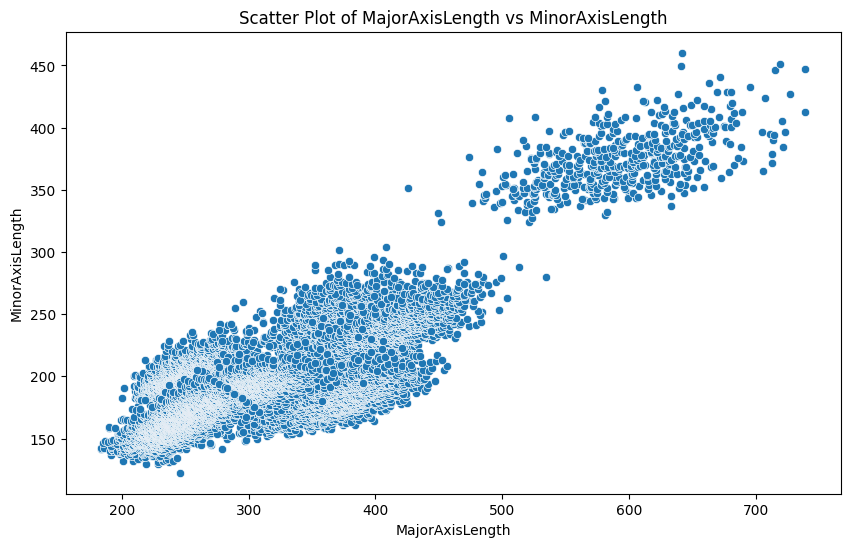

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MajorAxisLength', y='MinorAxisLength', data=df)
plt.title('Scatter Plot of MajorAxisLength vs MinorAxisLength')
plt.xlabel('MajorAxisLength')
plt.ylabel('MinorAxisLength')
plt.show()


# Execution

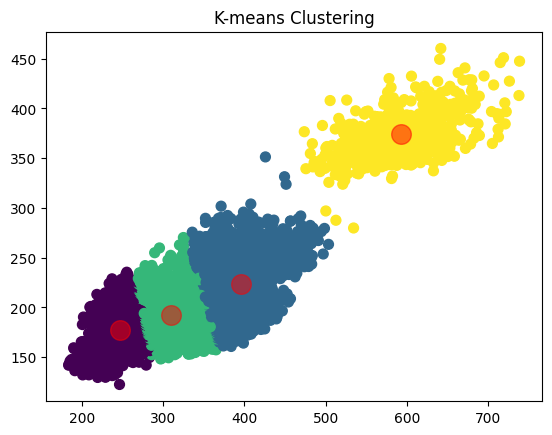

In [6]:
# Extract MajorAxisLength and MinorAxisLength as features for clustering
X = df[['MajorAxisLength', 'MinorAxisLength']].values



# Step 3: K-means Implementation
class KMeans:
    def __init__(self, n_clusters=4, max_iters=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = []

    def fit(self, X):
        # Randomly initialize centroids
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx, :]
        
        for i in range(self.max_iters):
            # Assignment step
            clusters = self.assign_clusters(X)
            # Update step
            new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(self.n_clusters)])
            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            self.centroids = new_centroids
        
        self.labels_ = self.assign_clusters(X)
    
    def assign_clusters(self, X):
        distances = self.compute_distances(X)
        return np.argmin(distances, axis=1)
    
    def compute_distances(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return distances.T
    
    def predict(self, X):
        return self.assign_clusters(X)

# Instantiate and fit KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Step 4: Visualization
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, alpha=0.5, c='red')
plt.title("K-means Clustering")
plt.show()

# Step 5: Evaluation (Optional)
# This step might involve computing the WCSS or silhouette score to evaluate the performance of the clustering


# Model Validation

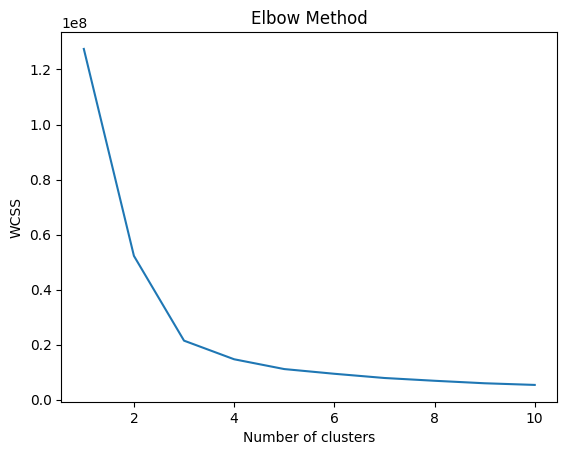

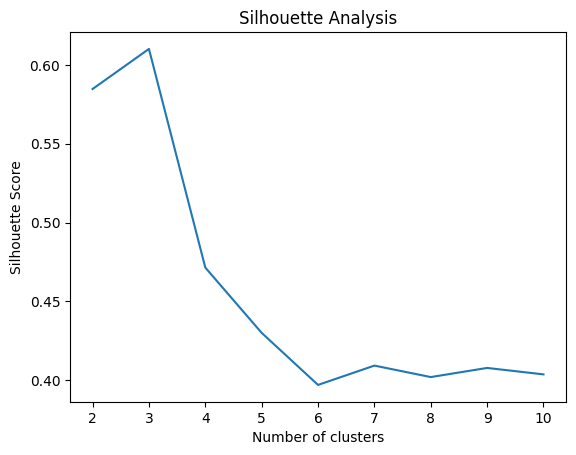

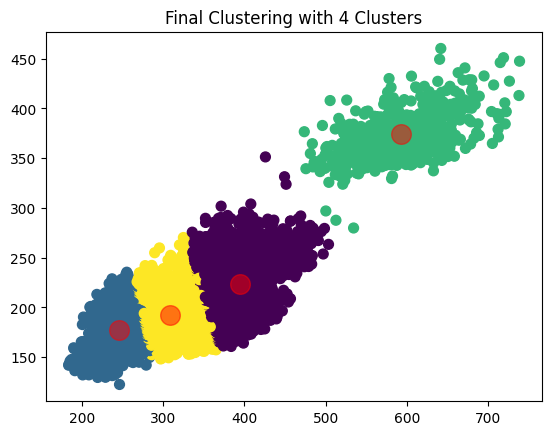

Final Silhouette Score: 0.47150954544406665


In [7]:
# Additional imports for evaluation
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score

# Step 4.1: Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = SKLearnKMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Step 4.2: Silhouette Analysis to further assess the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):  # Silhouette score is not defined for a single cluster
    kmeans = SKLearnKMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Step 4.3: Choose the optimal number of clusters and retrain the model
optimal_clusters = 4  # Assuming 4 is optimal based on Elbow and Silhouette Analysis
kmeans = SKLearnKMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Step 4.4: Visualizing the final clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha=0.5, c='red')
plt.title(f"Final Clustering with {optimal_clusters} Clusters")
plt.show()

# Step 4.5: Evaluate the final model
# Assuming the silhouette score as a performance metric
final_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f"Final Silhouette Score: {final_silhouette_score}")


# Model Improvement

c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

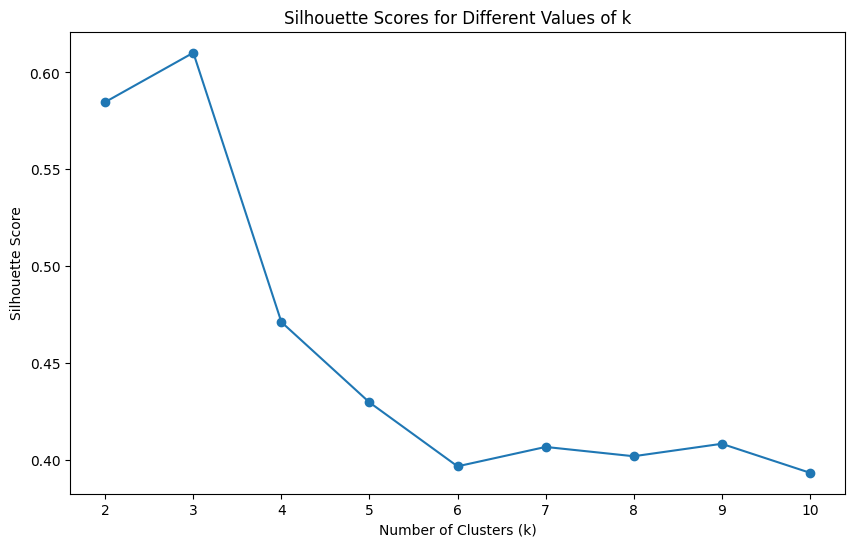

The optimal number of clusters k is: 3


In [8]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def calculate_optimal_k(X, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    
    # Plotting the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different Values of k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
    print(f"The optimal number of clusters k is: {optimal_k}")
    return optimal_k

# Usage example
# X is your dataset
k_range = range(2, 11)  # Adjust the range of k as needed
optimal_k = calculate_optimal_k(X, k_range)


# Results

c:\Users\David\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


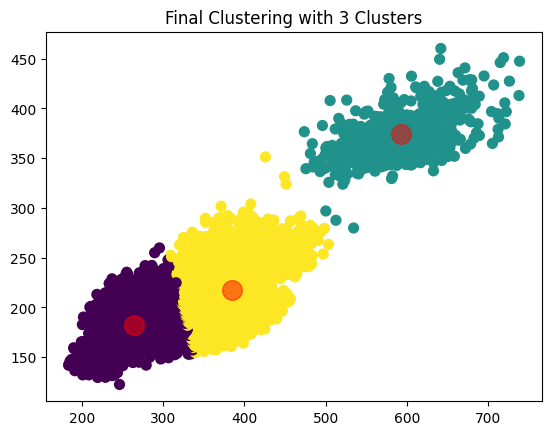

In [9]:
# Model finetuning
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)
# Visualize the final clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, alpha=0.5, c='red')
plt.title(f"Final Clustering with {optimal_k} Clusters")
plt.show()



# Error Estimation

Final Silhouette Score: 0.47150954544406665

# Analysis 

We picked a random k cluster based on a quick visual look to be 4. As we did the algorithm, elbow method, and silhouette, the best k value is 3. 

# Conclusion

The result indicates there are three distinct groups of beans when considering the variability in their major and minor axis lengths. This suggests that the beans can be broadly categorized into three different sizes or shapes, which might correspond to different types or varieties of beans.

  It might reveal that the beans are not uniformly distributed across the range of sizes but rather cluster around three sizes or shapes. This could be useful for understanding the natural variation within the bean types is being studied or could point towards different sources or conditions of growth affecting bean sizes.

In [39]:

# Create a new feature in basket form
df['basket_data'] = df.apply(lambda row: list(row), axis=1) 

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,basket_data
0,39,7,15,4,1,1,4,1,40,33,0,"[39, 7, 15, 4, 1, 1, 4, 1, 40, 33, 0, [39, Sta..."
1,50,6,15,2,10,0,4,1,13,33,0,"[50, 6, 15, 2, 10, 0, 4, 1, 13, 33, 0, [50, Se..."
2,38,4,3,0,12,1,4,1,40,33,0,"[38, 4, 3, 0, 12, 1, 4, 1, 40, 33, 0, [38, Pri..."
3,53,4,1,2,12,0,2,1,40,33,0,"[53, 4, 1, 2, 12, 0, 2, 1, 40, 33, 0, [53, Pri..."
4,28,4,15,2,2,5,2,0,40,38,0,"[28, 4, 15, 2, 2, 5, 2, 0, 40, 38, 0, [28, Pri..."


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd


# Convert the categorical data into a list of lists (transactions)
transactions = cleaned_df.apply(lambda row: [f"{col}={row[col]}" for col in cleaned_df.columns if cleaned_df[col].dtype == 'object'], axis=1).tolist()

# Use TransactionEncoder to encode the transactions into a one-hot encoded DataFrame
encoder = TransactionEncoder()
transactions_encoded = encoder.fit(transactions).transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(transactions_df, min_support=0.1, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                            antecedents  \
0                                 (education=Bachelors)   
1                                 (education=Bachelors)   
2                                 (education=Bachelors)   
3                                 (education=Bachelors)   
4                                   (education=HS-grad)   
...                                                 ...   
1471  (relationship=Husband, native-country=United-S...   
1472                   (sex=Male, relationship=Husband)   
1473          (workclass=Private, relationship=Husband)   
1474                 (race=White, relationship=Husband)   
1475                             (relationship=Husband)   

                                            consequents   support  confidence  \
0                        (native-country=United-States)  0.149367    0.902550   
1                                          (race=White)  0.145398    0.878569   
2                                            (se

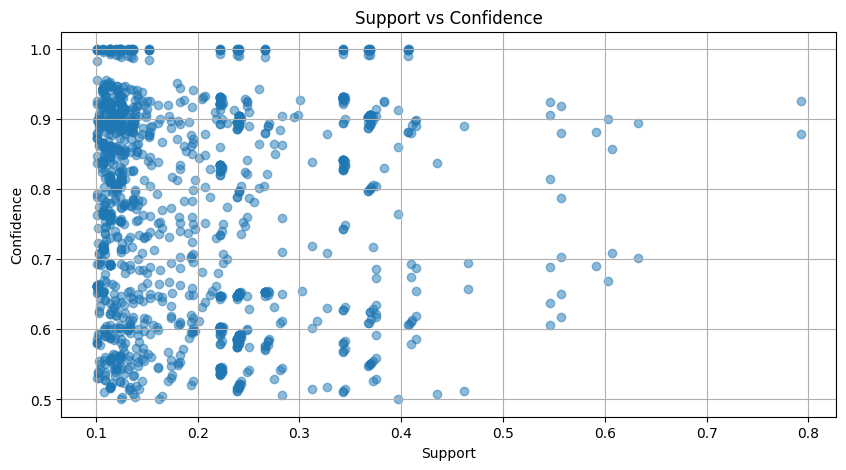

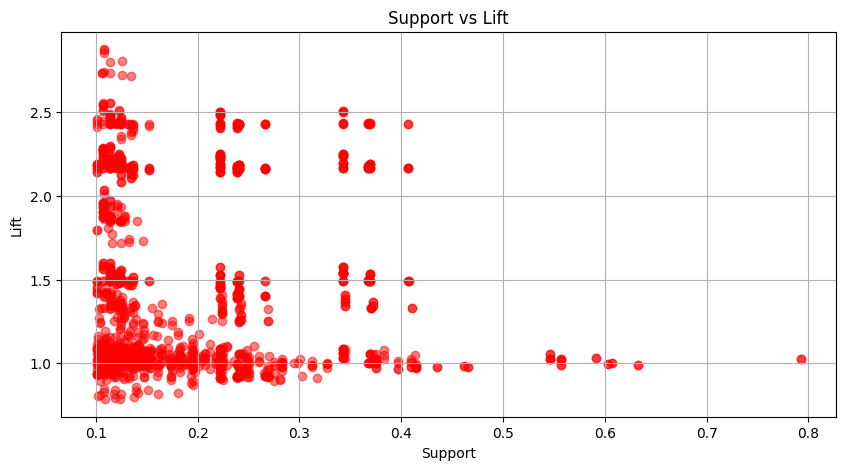

In [46]:
import matplotlib.pyplot as plt

# Assuming 'rules' is the DataFrame containing your association rules

# Plot for Support vs Confidence
plt.figure(figsize=(10, 5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

# Plot for Support vs Lift
plt.figure(figsize=(10, 5))
plt.scatter(rules['support'], rules['lift'], alpha=0.5, color='red')
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


### Conclusion ###


The support is low but the confidence is high
This can provide valuable insights into niche or specific scenarios

With the Support vs Lift, there is a positive relation  between the antecedent and consequent, meaning the presence of one increases the likelihood of the other occurring. Since the majority of points are at the baseline. 